In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import datetime

import poloniex

In [2]:
polo = poloniex.Poloniex()
period = polo.DAY # period of data
end = time.time()
start = end - period * 365 # 1 year

chart = polo.returnChartData('USDT_BTC', period=period, start=start, end=end)

In [3]:
df = DataFrame.from_dict(chart)
df.head()

,date,high,low,open,close,volume,quoteVolume,weightedAverage
0,1587047143,7102.97007759,7102.97007759,7102.97007759,7102.97007759,0,0,7102.97007759
1,1587081600,7145.2635139,6989.60953583,7101.43907546,7027.97325633,14696919.06038548,2080.44096022,7064.32883287
2,1587168000,7288,7019.2981548,7028.21575547,7249.37990615,15290984.03818091,2133.9812832,7165.47242403
3,1587254400,7263.94978123,7055,7249.74240098,7122.5750678,13355128.48926706,1866.9663957,7153.38450655
4,1587340800,7215.4545786,6754.98685593,7121.34630296,6829.13146916,18584506.41530484,2656.58514571,6995.63740515


In [4]:
timestamp = df['date'].values.tolist() # Series -> ndarray -> list
# timestamp -> year/month/day
date = [datetime.datetime.fromtimestamp(timestamp[i]).date() for i in range(len(timestamp))]
df['date'] = date
df.head()

,date,high,low,open,close,volume,quoteVolume,weightedAverage
0,2020-04-16,7102.97007759,7102.97007759,7102.97007759,7102.97007759,0,0,7102.97007759
1,2020-04-17,7145.2635139,6989.60953583,7101.43907546,7027.97325633,14696919.06038548,2080.44096022,7064.32883287
2,2020-04-18,7288,7019.2981548,7028.21575547,7249.37990615,15290984.03818091,2133.9812832,7165.47242403
3,2020-04-19,7263.94978123,7055,7249.74240098,7122.5750678,13355128.48926706,1866.9663957,7153.38450655
4,2020-04-20,7215.4545786,6754.98685593,7121.34630296,6829.13146916,18584506.41530484,2656.58514571,6995.63740515


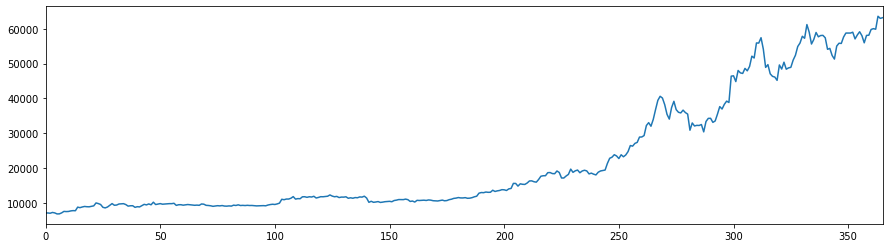

In [5]:
price = df['open'].astype(float)
price.plot(figsize=(15, 4))

In [6]:
date = [datetime.datetime.fromtimestamp(timestamp[i]).date() for i in range(len(timestamp))]
date_str = [date[i].strftime('%Y-%m-%d') for i in range(len(date))]
date_str

['2020-04-16',
 '2020-04-17',
 '2020-04-18',
 '2020-04-19',
 '2020-04-20',
 '2020-04-21',
 '2020-04-22',
 '2020-04-23',
 '2020-04-24',
 '2020-04-25',
 '2020-04-26',
 '2020-04-27',
 '2020-04-28',
 '2020-04-29',
 '2020-04-30',
 '2020-05-01',
 '2020-05-02',
 '2020-05-03',
 '2020-05-04',
 '2020-05-05',
 '2020-05-06',
 '2020-05-07',
 '2020-05-08',
 '2020-05-09',
 '2020-05-10',
 '2020-05-11',
 '2020-05-12',
 '2020-05-13',
 '2020-05-14',
 '2020-05-15',
 '2020-05-16',
 '2020-05-17',
 '2020-05-18',
 '2020-05-19',
 '2020-05-20',
 '2020-05-21',
 '2020-05-22',
 '2020-05-23',
 '2020-05-24',
 '2020-05-25',
 '2020-05-26',
 '2020-05-27',
 '2020-05-28',
 '2020-05-29',
 '2020-05-30',
 '2020-05-31',
 '2020-06-01',
 '2020-06-02',
 '2020-06-03',
 '2020-06-04',
 '2020-06-05',
 '2020-06-06',
 '2020-06-07',
 '2020-06-08',
 '2020-06-09',
 '2020-06-10',
 '2020-06-11',
 '2020-06-12',
 '2020-06-13',
 '2020-06-14',
 '2020-06-15',
 '2020-06-16',
 '2020-06-17',
 '2020-06-18',
 '2020-06-19',
 '2020-06-20',
 '2020-06-

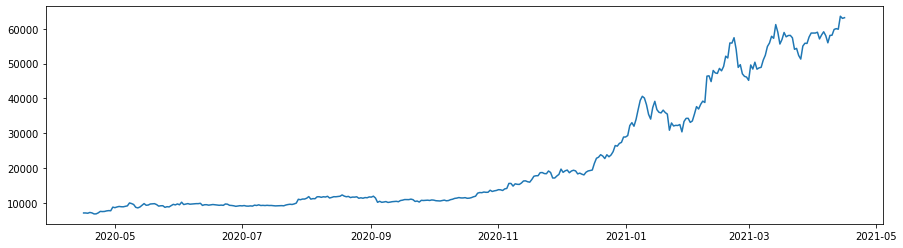

In [7]:
plt.figure(figsize=(15, 4))
plt.plot(date, price)

In [9]:
import mplfinance as mpf

In [31]:
df_candle = df.tail(100)
df_candle.index = pd.to_datetime(df_candle['date'])
df_candle = df_candle[['open', 'high', 'low', 'close', 'volume']]
df_candle.columns = ['Open', 'High', 'Low', 'Close', 'Volume']
df_candle = df_candle.astype(float)
df_candle.head()

,Open,High,Low,Close,Volume
date,,,,,
2021-01-07,36780.000000,40311.359196,36300.000000,39430.389498,1.218154e+08
2021-01-08,39426.446162,41888.000000,36596.801228,40600.000000,1.352822e+08
2021-01-09,40594.554895,41352.324706,38750.000000,40091.109561,8.756184e+07
2021-01-10,40093.114083,41292.906632,35135.509181,38181.904172,9.461835e+07
2021-01-11,38181.904172,38244.949446,30313.000000,35438.703659,2.144015e+08


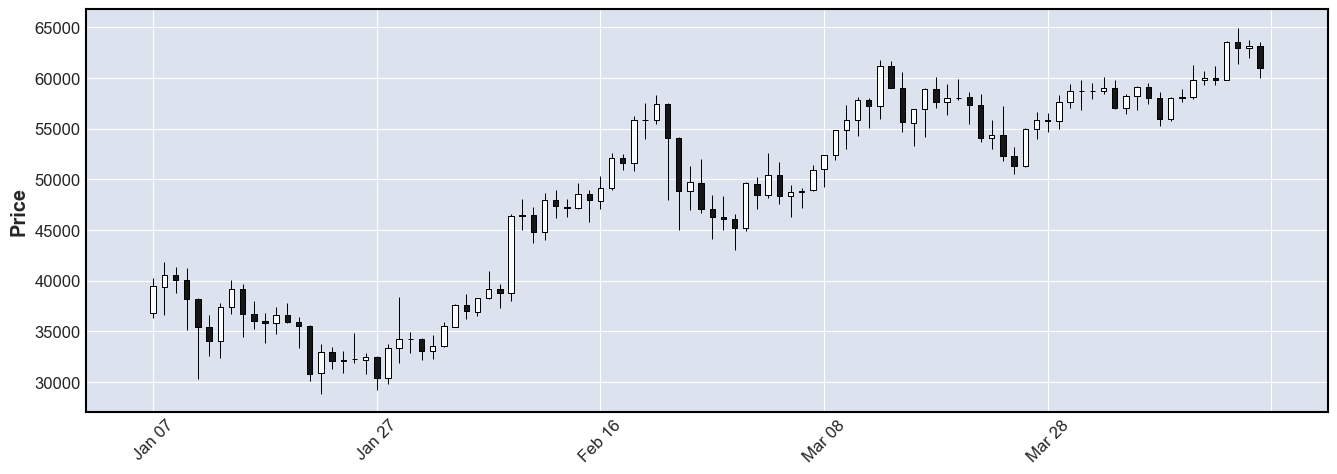

In [33]:
mpf.plot(df_candle, type='candle', figratio=(12,4), savefig='candlestick_btc.png')
mpf.plot(df_candle, type='candle', figratio=(12,4))